# Retail Forecasting



## Problem Statement:

The large company who is into beverages business in Australia. They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality. They needed forecast of each of products at item level every week in weekly buckets. 

In [1]:
#import data 
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 

In [2]:
forecast = pd.read_csv('./Data/forecast.csv')
forecast.head(3)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0


In [3]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


In [4]:
forecast.duplicated().sum()

0

In [5]:
forecast.isnull().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

There are no duplicate or null values.

In [6]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


In [7]:
form = "%m/%d/%Y"
forecast['date'] = forecast['date'].apply(lambda x: datetime.strptime(x, form))
forecast.head(3)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,17%,0,0,0,0.0,0,0,0,0


In [8]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   object        
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 114.3+ KB


In [9]:
forecast["date"].min()

Timestamp('2017-02-05 00:00:00')

In [10]:
forecast["date"].max()

Timestamp('2020-12-27 00:00:00')

## Add day of the Week

In [11]:
forecast["DayOfWeek"] = forecast['date'].apply(lambda x: x.strftime('%A'))
forecast.head(3)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek
0,SKU1,2017-02-05,27750,0%,0,0,0,0.0,0,0,0,0,Sunday
1,SKU1,2017-02-12,29023,0%,1,0,1,0.0,0,1,0,0,Sunday
2,SKU1,2017-02-19,45630,17%,0,0,0,0.0,0,0,0,0,Sunday


In [12]:
forecast["DayOfWeek"].unique()

array(['Sunday'], dtype=object)

In [13]:
forecast.head(-3)

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek
0,SKU1,2017-02-05,27750,0%,0,0,0,0.00,0,0,0,0,Sunday
1,SKU1,2017-02-12,29023,0%,1,0,1,0.00,0,1,0,0,Sunday
2,SKU1,2017-02-19,45630,17%,0,0,0,0.00,0,0,0,0,Sunday
3,SKU1,2017-02-26,26789,0%,1,0,1,0.00,0,0,0,0,Sunday
4,SKU1,2017-03-05,41999,17%,0,0,0,0.00,0,0,0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,SKU6,2020-09-27,21692,44%,1,0,1,-7.79,1,0,0,0,Sunday
1211,SKU6,2020-10-04,23072,44%,1,0,1,-9.73,1,0,0,0,Sunday
1212,SKU6,2020-10-11,42044,44%,0,1,0,-7.39,1,0,0,0,Sunday
1213,SKU6,2020-10-18,96619,54%,0,1,0,-7.56,1,0,0,0,Sunday


All of the days of sales are on Sunday because the company needed the forecast of each of products at item level every week in weekly buckets.

# Add Discount

In [14]:
def p2f(x):
    return float(x.strip('%'))/100

In [15]:
forecast['Price Discount (%)'] = forecast['Price Discount (%)'].apply(lambda x: p2f(x))

#rename column
forecast = forecast.rename(columns={"Price Discount (%)": "Discount"})

forecast.head()

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,Sunday
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,Sunday


## Add Quarter 

In [16]:
forecast['Quarter'] = forecast['date'].dt.quarter
forecast.head()

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,Sunday,1
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,Sunday,1


In [17]:
forecast['Quarter'].unique()

array([1, 2, 3, 4])

## Add Week Number

Number of the week of the year

In [18]:
forecast['WeekNum'] = forecast['date'].apply(lambda x: x.isocalendar().week)
forecast.head()

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,Sunday,1,8
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,9


In [19]:
forecast['WeekNum'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4])

## Check for outliers

Because this is a time series I won't delete the outliers, but I want to take a better look at them.

<AxesSubplot:title={'center':'Distributions Each Product Sales'}, xlabel='Sales', ylabel='Product'>

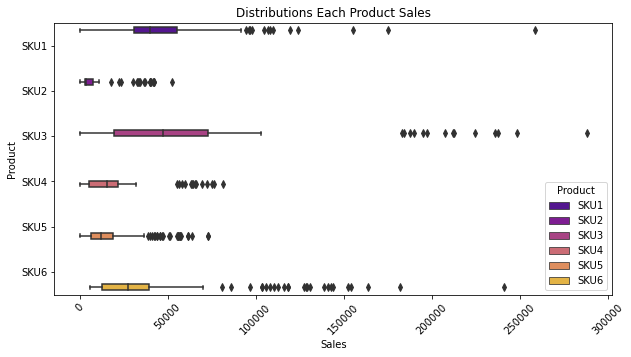

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation = 45)

plt.title("Distributions Each Product Sales")

sns.boxplot(data =forecast, x="Sales", y="Product", hue="Product", palette="plasma")

There are outliers. There are products that have more sales than others. I am assuming that the outliers are around the holidays and will keep them for the time being.

<AxesSubplot:title={'center':'Distributions Each Sales by Quarter'}, xlabel='Quarter', ylabel='Sales'>

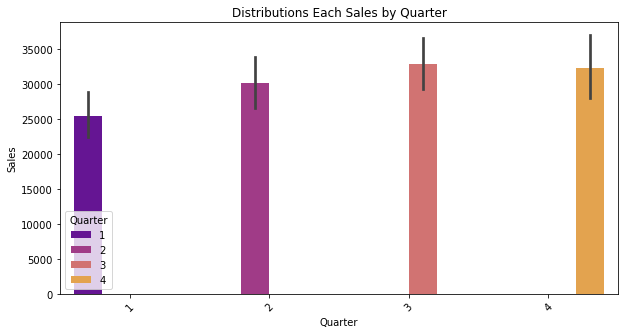

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation = 45)

plt.title("Distributions Each Sales by Quarter")

sns.barplot(data=forecast, y="Sales", x="Quarter", hue="Quarter", palette="plasma")

In [22]:
print(forecast["Sales"].max())
print(forecast["Sales"].min())

288322
0


In [23]:
forecast[forecast["Sales"] == 288322]

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
478,SKU3,2018-06-10,288322,0.5,1,0,1,0.0,0,0,0,0,Sunday,2,23


In [24]:
forecast[forecast["Sales"] == 0]

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
198,SKU1,2020-11-22,0,0.12,1,0,1,-5.96,1,0,0,0,Sunday,4,47
199,SKU1,2020-11-29,0,0.16,1,0,1,-5.30,1,0,0,0,Sunday,4,48
200,SKU1,2020-12-06,0,0.15,1,0,1,-4.38,1,0,0,0,Sunday,4,49
201,SKU1,2020-12-13,0,0.14,1,0,1,-4.74,1,0,0,0,Sunday,4,50
202,SKU1,2020-12-20,0,0.15,1,0,1,-10.27,1,0,0,1,Sunday,4,51
203,SKU1,2020-12-27,0,0.15,1,0,0,-6.95,1,0,0,0,Sunday,4,52
402,SKU2,2020-11-22,0,0.27,1,0,0,-5.96,1,0,0,0,Sunday,4,47
403,SKU2,2020-11-29,0,0.23,1,0,0,-5.30,1,0,0,0,Sunday,4,48
404,SKU2,2020-12-06,0,0.22,0,0,0,-4.38,1,0,0,0,Sunday,4,49
405,SKU2,2020-12-13,0,0.22,0,0,0,-4.74,1,0,0,0,Sunday,4,50


All of the zero dollar sales are in quarter 4. There was only one row with the max amount of $288,322, and it was in June.

In [25]:
forecast.head(3)

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7


### Check Stats

In [26]:
boxplot_stats(forecast["Sales"])

[{'mean': 30294.678981937603,
  'iqr': 33069.5,
  'cilo': 18254.340168131275,
  'cihi': 21229.659831868725,
  'whishi': 89706,
  'whislo': 0,
  'fliers': array([108159,  96610, 104775,  94633, 155253,  91870,  97972, 109917,
         174994,  96211, 119393, 106885, 258874, 124261, 212245, 248373,
         236242, 212947,  91541, 288322,  98300,  94025, 237462,  94028,
         195088, 197503, 224723, 207356, 182891, 187548, 102770,  97959,
         184365, 189965, 118504, 142953, 131072, 118276, 129254, 154098,
         241114, 110490, 128647, 107913, 127468, 140995, 181833, 105995,
         112451, 103831, 103617, 138789, 143887, 163536,  96619, 115798,
         152186]),
  'q1': 7212.75,
  'med': 19742.0,
  'q3': 40282.25}]

In [27]:
#get product by sku 

prod1 = forecast[(forecast["Product"] == 'SKU1')]
prod2 = forecast[(forecast["Product"] == 'SKU2')]
prod3 = forecast[(forecast["Product"] == 'SKU3')]
prod4 = forecast[(forecast["Product"] == 'SKU4')]
prod5 = forecast[(forecast["Product"] == 'SKU5')]
prod6 = forecast[(forecast["Product"] == 'SKU6')]

In [28]:
#get outliers and stats
import pprint

def outliers(df):
    stats = boxplot_stats(df["Sales"])
    pprint.PrettyPrinter(width=20).pprint(stats)
    
    return boxplot_stats(df["Sales"]).pop(0)['fliers']

In [29]:
#product 1
outlier1 = outliers(prod1)
outlier1

[{'cihi': 42317.73069995537,
  'cilo': 36937.26930004463,
  'fliers': array([108159,  96610, 104775,  94633, 155253,  97972, 109917, 174994,
        96211, 119393, 106885, 258874, 124261]),
  'iqr': 24474.0,
  'mean': 47521.901960784315,
  'med': 39627.5,
  'q1': 30795.75,
  'q3': 55269.75,
  'whishi': 91870,
  'whislo': 0}]


array([108159,  96610, 104775,  94633, 155253,  97972, 109917, 174994,
        96211, 119393, 106885, 258874, 124261])

In [30]:
#product 2
outlier2 = outliers(prod2)
outlier2

[{'cihi': 3929.0841775693443,
  'cilo': 2855.9158224306557,
  'fliers': array([41915, 52122, 33566, 40527, 32549, 17970, 41316, 42002, 32900,
       23327, 36674, 37065, 40111, 39870, 30409, 34327, 40169, 22460]),
  'iqr': 4881.5,
  'mean': 7304.666666666667,
  'med': 3392.5,
  'q1': 2820.75,
  'q3': 7702.25,
  'whishi': 10895,
  'whislo': 0}]


array([41915, 52122, 33566, 40527, 32549, 17970, 41316, 42002, 32900,
       23327, 36674, 37065, 40111, 39870, 30409, 34327, 40169, 22460])

In [31]:
#product 3
outlier3 = outliers(prod3)
outlier3

[{'cihi': 52861.78764977916,
  'cilo': 41139.21235022084,
  'fliers': array([212245, 248373, 236242, 212947, 288322, 237462, 195088, 197503,
       224723, 207356, 182891, 187548, 184365, 189965]),
  'iqr': 53322.25,
  'mean': 55833.73039215686,
  'med': 47000.5,
  'q1': 19622.25,
  'q3': 72944.5,
  'whishi': 102770,
  'whislo': 0}]


array([212245, 248373, 236242, 212947, 288322, 237462, 195088, 197503,
       224723, 207356, 182891, 187548, 184365, 189965])

In [32]:
#product 4
outlier4 = outliers(prod4)
outlier4

[{'cihi': 17072.803021667605,
  'cilo': 13467.196978332393,
  'fliers': array([65464, 63256, 75377, 69467, 72261, 66114, 63842, 59637, 64115,
       56430, 54996, 58091, 76346, 81301]),
  'iqr': 16400.75,
  'mean': 16976.524509803923,
  'med': 15270.0,
  'q1': 5368.75,
  'q3': 21769.5,
  'whishi': 32133,
  'whislo': 0}]


array([65464, 63256, 75377, 69467, 72261, 66114, 63842, 59637, 64115,
       56430, 54996, 58091, 76346, 81301])

In [33]:
#product 5
outlier5 = outliers(prod5)
outlier5

[{'cihi': 13634.264355581945,
  'cilo': 10863.735644418055,
  'fliers': array([42344, 45348, 55905, 73114, 55567, 50485, 51114, 42963, 55160,
       56275, 43611, 46909, 45838, 40051, 47061, 57064, 61658, 39035,
       63644, 56807, 57496, 61753, 73058, 43900, 40956]),
  'iqr': 12602.25,
  'mean': 16471.024509803923,
  'med': 12249.0,
  'q1': 6450.25,
  'q3': 19052.5,
  'whishi': 36651,
  'whislo': 0}]


array([42344, 45348, 55905, 73114, 55567, 50485, 51114, 42963, 55160,
       56275, 43611, 46909, 45838, 40051, 47061, 57064, 61658, 39035,
       63644, 56807, 57496, 61753, 73058, 43900, 40956])

In [34]:
#product 6
outlier6 = outliers(prod6)
outlier6

[{'cihi': 30561.760985853558,
  'cilo': 24664.239014146442,
  'fliers': array([118504, 142953, 131072, 118276, 129254, 154098, 241114, 110490,
       128647, 107913, 127468, 140995, 181833, 105995, 112451,  86119,
       103831, 103617, 138789, 143887, 163536,  80769,  96619, 115798,
       152186]),
  'iqr': 26428.5,
  'mean': 37883.42424242424,
  'med': 27613.0,
  'q1': 12799.25,
  'q3': 39227.75,
  'whishi': 69799,
  'whislo': 6067}]


array([118504, 142953, 131072, 118276, 129254, 154098, 241114, 110490,
       128647, 107913, 127468, 140995, 181833, 105995, 112451,  86119,
       103831, 103617, 138789, 143887, 163536,  80769,  96619, 115798,
       152186])

# Get rows that are in outlier array

In [35]:
def outlierArray(df, array):
    
    outliers = df[df["Sales"].isin(array)]
    length = str(len(outliers))
    
    print("Outliers: " + length)
    print(outliers.groupby("Quarter")["Quarter"].count())
    
    return outliers

In [36]:
#product 1
outlierArray(forecast, outlier1)

Outliers: 13
Quarter
2     2
4    11
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
10,SKU1,2017-04-16,108159,0.44,0,0,0,0.0,0,0,0,0,Sunday,2,15
34,SKU1,2017-10-01,96610,0.44,0,0,0,0.0,0,0,0,0,Sunday,4,39
39,SKU1,2017-11-05,104775,0.44,1,0,0,0.0,0,0,0,0,Sunday,4,44
45,SKU1,2017-12-17,94633,0.17,1,0,0,0.0,0,0,0,0,Sunday,4,50
46,SKU1,2017-12-24,155253,0.17,1,0,0,0.0,0,0,0,0,Sunday,4,51
91,SKU1,2018-11-04,97972,0.44,1,0,1,0.0,0,0,0,0,Sunday,4,44
96,SKU1,2018-12-09,109917,0.44,0,1,1,0.0,0,0,0,0,Sunday,4,49
98,SKU1,2018-12-23,174994,0.28,1,0,1,0.0,0,0,0,0,Sunday,4,51
99,SKU1,2018-12-30,96211,0.28,0,0,0,0.0,0,0,0,0,Sunday,4,52
115,SKU1,2019-04-21,119393,0.44,0,0,0,0.0,0,0,0,0,Sunday,2,16


Most of the sales of product 1 are in the fourth quarter. Most of the sales have a discount of 44%. There are 13 rows of outliers.

In [37]:
#product 2
outlierArray(forecast, outlier2)

Outliers: 18
Quarter
1    4
2    7
3    1
4    6
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
210,SKU2,2017-03-19,41915,0.5,0,0,0,0.00,0,0,0,0,Sunday,1,11
219,SKU2,2017-05-21,52122,0.5,1,0,0,0.00,0,0,0,0,Sunday,2,20
224,SKU2,2017-06-25,33566,0.5,0,0,0,0.00,0,0,0,0,Sunday,2,25
242,SKU2,2017-10-29,40527,0.5,0,0,0,0.00,0,0,0,0,Sunday,4,43
257,SKU2,2018-02-11,32549,0.5,1,0,0,0.00,0,1,0,0,Sunday,1,6
265,SKU2,2018-04-08,17970,0.5,1,0,0,0.00,0,0,1,0,Sunday,2,14
270,SKU2,2018-05-13,41316,0.5,1,0,0,0.00,0,0,0,0,Sunday,2,19
276,SKU2,2018-06-24,42002,0.5,1,0,0,0.00,0,0,0,0,Sunday,2,25
291,SKU2,2018-10-07,32900,0.5,1,0,0,0.00,0,0,0,0,Sunday,4,40
311,SKU2,2019-02-24,23327,0.5,1,0,0,0.00,0,0,0,0,Sunday,1,8


There are 18 outliers for product 2. There were outliers in all quarters, but the one with most is in quarter 2. All of the price discounts are 50%.

In [38]:
#product 3
outlierArray(forecast, outlier3)

Outliers: 14
Quarter
1    2
2    4
3    6
4    2
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
421,SKU3,2017-05-07,212245,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,18
426,SKU3,2017-06-11,248373,0.50,1,0,1,0.00,0,0,0,0,Sunday,2,23
437,SKU3,2017-08-27,236242,0.50,1,0,1,0.00,0,0,0,0,Sunday,3,34
447,SKU3,2017-11-05,212947,0.50,1,0,1,0.00,0,0,0,0,Sunday,4,44
478,SKU3,2018-06-10,288322,0.50,1,0,1,0.00,0,0,0,0,Sunday,2,23
494,SKU3,2018-09-30,237462,0.50,1,0,1,0.00,0,0,0,0,Sunday,3,39
514,SKU3,2019-02-17,195088,0.50,1,0,1,0.00,0,0,0,0,Sunday,1,7
530,SKU3,2019-06-09,197503,0.55,1,0,0,0.00,0,0,0,0,Sunday,2,23
540,SKU3,2019-08-18,224723,0.52,1,0,1,0.00,0,0,0,0,Sunday,3,33
546,SKU3,2019-09-29,207356,0.54,1,0,1,0.00,0,0,0,0,Sunday,3,39


There are 14 outliers for product 3. Quarter 3 had the most outliers. Most of the discount percentage is around 55%, but there are two rows with 83% discount that was in quarter 3. 

In [39]:
#product 4
outlierArray(forecast, outlier4)

Outliers: 14
Quarter
1    2
2    4
3    6
4    2
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
625,SKU4,2017-05-07,65464,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,18
630,SKU4,2017-06-11,63256,0.50,1,0,1,0.00,0,0,0,0,Sunday,2,23
641,SKU4,2017-08-27,75377,0.50,1,0,1,0.00,0,0,0,0,Sunday,3,34
651,SKU4,2017-11-05,69467,0.50,1,0,1,0.00,0,0,0,0,Sunday,4,44
682,SKU4,2018-06-10,72261,0.50,1,0,1,0.00,0,0,0,0,Sunday,2,23
698,SKU4,2018-09-30,66114,0.50,1,0,1,0.00,0,0,0,0,Sunday,3,39
718,SKU4,2019-02-17,63842,0.50,1,0,1,0.00,0,0,0,0,Sunday,1,7
734,SKU4,2019-06-09,59637,0.54,1,0,0,0.00,0,0,0,0,Sunday,2,23
744,SKU4,2019-08-18,64115,0.55,1,0,1,0.00,0,0,0,0,Sunday,3,33
750,SKU4,2019-09-29,56430,0.49,1,0,1,0.00,0,0,0,0,Sunday,3,39


There are 14 outliers for product 4. Quarter 3 had the most outliers. Several of the discount percentage is around 50%, but there are two rows with 75% discount that was in quarter 3.

In [40]:
#product 5
outlierArray(forecast, outlier5)

Outliers: 25
Quarter
1     1
2     8
3    13
4     3
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
827,SKU5,2017-04-23,42344,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,16
830,SKU5,2017-05-14,45348,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,19
838,SKU5,2017-07-09,55905,0.50,1,0,0,0.00,0,0,0,0,Sunday,3,27
844,SKU5,2017-08-20,73114,0.50,1,0,0,0.00,0,0,0,0,Sunday,3,33
849,SKU5,2017-09-24,55567,0.50,1,0,0,0.00,0,0,0,0,Sunday,3,38
856,SKU5,2017-11-12,50485,0.50,1,0,0,0.00,0,0,0,0,Sunday,4,45
866,SKU5,2018-01-21,51114,0.50,1,0,0,0.00,0,0,0,0,Sunday,1,3
880,SKU5,2018-04-29,42963,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,17
885,SKU5,2018-06-03,55160,0.50,1,0,0,0.00,0,0,0,0,Sunday,2,22
889,SKU5,2018-07-01,56275,0.50,0,1,0,0.00,0,0,0,0,Sunday,3,26


There are 25 outliers for product 5. Quarter 3 had the most outliers. Most of the discount percentage is around 50%.

In [41]:
#product 6
outlierArray(forecast, outlier6)

Outliers: 25
Quarter
1     3
2     3
3     8
4    11
Name: Quarter, dtype: int64


,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
1025,SKU6,2017-03-12,118504,0.53,1,0,1,0.00,0,0,0,0,Sunday,1,10
1037,SKU6,2017-06-04,142953,0.53,1,0,1,0.00,0,0,0,0,Sunday,2,22
1041,SKU6,2017-07-02,131072,0.53,1,0,1,0.00,0,0,0,0,Sunday,3,26
1046,SKU6,2017-08-06,118276,0.53,1,0,1,0.00,0,0,0,0,Sunday,3,31
1053,SKU6,2017-09-24,129254,0.53,0,0,0,0.00,0,0,0,0,Sunday,3,38
1057,SKU6,2017-10-22,154098,0.53,0,1,1,0.00,0,0,0,0,Sunday,4,42
1058,SKU6,2017-10-29,241114,0.53,1,0,0,0.00,0,0,0,0,Sunday,4,43
1077,SKU6,2018-03-11,110490,0.53,1,0,1,0.00,0,0,0,0,Sunday,1,10
1089,SKU6,2018-06-03,128647,0.53,1,0,0,0.00,0,0,0,0,Sunday,2,22
1095,SKU6,2018-07-15,107913,0.53,1,0,1,0.00,0,0,0,0,Sunday,3,28


There are 25 outliers for product 6. Quarter 4 had the most outliers. Most of the discount percentage is around 50%.

Looking at the outliers for each product, most of the outliers come from quarter 3 and 4. The fourth quarter has the holidays, so customers are spending money for the holidays. Same with quarter 3. In quarter 3 people are going on vacations and returning back to school. There are some weeks where products had 0 sales, and most of those are in quarter 4. 

# Save Dataframe

In [42]:
forecast.to_csv(r'./Data/newForecast.csv')